<h1 align='center'> Análise exploratória dos dados da prova de 2022 do Exame Nacional do Ensino Médio</h1>

Com a finalidade de desenvolver minhas capacidades de análise, mas também de ter mais familiaridade na utilização de ferramentas de manipulação e visualização dos dados, como as bibliotecas do python, pandas e matplotlib, utilizei os microdados do ENEM 2022, disponibilizados nos dados abertos portal do INEP.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
#Lista de colunas de interesse para o o projeto

colunas = ['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'NU_NOTA_REDACAO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'Q006', 'NU_NOTA_MT']

In [85]:
#Carregamento dos dados com as colunas definidas

microdadosEnem = pd.read_csv("dados-brutos\DADOS\MICRODADOS_ENEM_2022.csv", sep=";", encoding='ISO-8859-1', usecols=colunas)

In [88]:
#Visualizaçao das 5 primeiras linhas

microdadosEnem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006
0,210057943671,2022,14,M,NaN,NaN,NaN,NaN,NaN,NaN,B
1,210057516120,2022,14,M,NaN,NaN,NaN,NaN,NaN,NaN,Q
2,210057280536,2022,5,F,NaN,NaN,NaN,NaN,565.3,760.0,B
3,210055724397,2022,6,M,NaN,NaN,NaN,NaN,416.0,320.0,A
4,210055097896,2022,4,M,NaN,NaN,NaN,NaN,NaN,NaN,B


In [89]:
coluna_no_municipio_esc = microdadosEnem['NO_MUNICIPIO_ESC']

<h3>Distribuição das escolas por estado do ENEM 2022</h3>

Um primeiro dado para nossa análise exploratória dos dados é o número de escolas por unidade da federação. O dado nos revela
que os estados do sudeste, como esperado por serem os com mais populosos do país, têm o maior número de escolas participantes da prova. Por outro lado, o estado do Ceará, que é apenas o oitavo mais populoso do país, figura como segundo colocado em número de escolas participantes.

#https://www.estadao.com.br/brasil/brasil-chega-a-2077-milhoes-de-habitantes-diz-ibge-veja-quais-sao-os-estados-mais-populosos/


<Axes: >

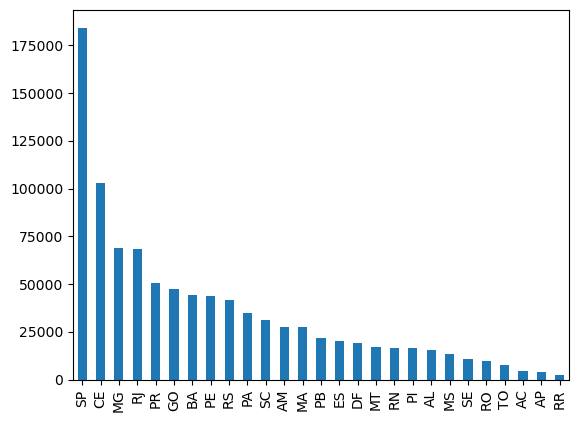

In [90]:
coluna_sg_uf_esc = microdadosEnem['SG_UF_ESC']
#Contagem do número de escolas por estado
coluna_sg_uf_esc.value_counts()
#Visualizacao do histograma da distribuicao de escolas por estado
coluna_sg_uf_esc.value_counts().plot.bar()

<h3>Comparação de desempenho por gênero dos candidatos do ENEM 2022</h3>

Outra comparação importante, e que pode nos dar pistas sobre os fatores que tem maior influência no resultado final é a comparação pelo gênero declarado pelos/as candidatos/as na hora da inscrição.

In [121]:
#Visualizacao apenas das colunas sexo de nascimento e nota da redacao, excluindo os valores nulos

colunasSelecionadas = ['TP_SEXO', 'NU_NOTA_REDACAO']
microdadosEnemSexoRedacao = microdadosEnem.filter(items=colunasSelecionadas).dropna()
microdadosEnemSexoRedacao.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             1530098.0  628.922919  213.217841  0.0  540.0  640.0  780.0   
M              963344.0  601.892533  209.538737  0.0  520.0  600.0  740.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0

Quando observamos os valores máximo e mínimo bem como o desvio padrão, não notamos diferença. No entanto, a média nos revela que o desempenho das mulheres é superior ao desempenho dos homens.

O resultado não traz exatamente uma novidade, uma vez que diversas pesquisas ao longo das últimas décadas apontam que a escolaridade média das mulheres é superior a dos homens. Além disso, que a probabilidade de estarem na universidade também é maior, embora ainda encontrem mais dificuldade de conseguir emprego quando comparadas aos homens.

https://agenciabrasil.ebc.com.br/economia/noticia/2019-06/mulheres-aumentam-escolaridade-em-relacao-aos-homens-mostra-pesquisa/ - <b>Mulheres aumentam escolaridade em relação aos homens, mostra pesquisa</b>
https://www.bbc.com/portuguese/geral-49639664 - <b>Mulheres são maioria nas universidades brasileiras, mas têm mais dificuldades em encontrar emprego</b>


Para auxiliar nossa análise, plotamos os histogramas com as distribuicoes das notas da redacao por sexo. Conforme as figuras abaixo, uma das conclusões que se pode extrair é que o gênero dos candidatos, apesar de dar pistas sobre o desempenho dos candidatos e ser um importante marcador social, não é suficiente para determinar quem é melhor ou não nesse tipo de avaliação, uma vez que as diferenças no desempenho são sutis nos conjuntos de dados.

TP_SEXO
F    [[Axes(0.125,0.11;0.775x0.77)]]
M    [[Axes(0.125,0.11;0.775x0.77)]]
dtype: object

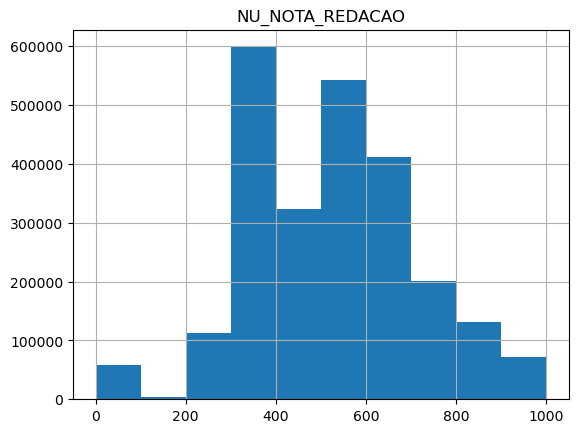

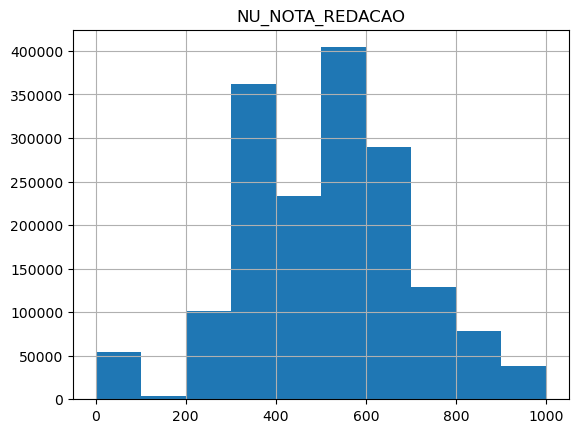

In [72]:
microdadosEnemSexoRedacao.groupby('TP_SEXO').hist()

<h3>Comparação de desempenho por faixa de renda do ENEM 2022</h3>

Outro viés de análise que parece ser interessante utilizar é o socioeconômico. Para tanto, destacamos as notas da redação e de matemática dos e das candidatas. 

In [122]:
colunasSelecionadas = ['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q006']
microdadosEnemSelecionado = microdadosEnem.filter(items=colunasSelecionadas).dropna()
#microdadosEnemSelecionado.head()

In [95]:
#Para tornar mais visual as alternativas, criamos um dicionário replicando as alternativas associadas
#a cada uma das opções.

dicionarioporRenda = {'A':'Nenhuma Renda',
                      'B':'Até R$ 1212',
                      'C':'R$ 1212,01 - 1.818,00',
                      'D':'R$ 1.818,01 - 2.424,00',
                      'E':'R$ 2.424,01 - 3.030,00',
                      'F':'R$ 3.030,01 - 3.636,00',
                      'G':'R$ 3.636,01 - 4.848,00',
                      'H':'R$ 4.848,01 - 6.060,00',
                      'I':'R$ 6.060,01 - 7.272,00',
                      'J':'R$ 7.272,01 - 8.484,00',
                      'K':'R$ 8.484,01 - 9.696,00',
                      'L':'R$ 9.696,01 - 10.908,00',
                      'M':'R$ 10.908,01 - 12.120,00',
                      'N':'R$ 12.120,01 - 14.544,00',
                      'O':'R$ 14.544,01 - 18.180,00',
                      'P':'R$ 18.180,01 - 24.240,00',
                      'Q':'Mais de R$ 24.240,00'}

In [96]:
microdadosEnemSelecionado['Faixa_Renda_Familiar'] = [dicionarioporRenda[resposta] for resposta in microdadosEnemSelecionado.Q006]

Um primeiro dado interessante é notar como se dá a distribuição das faixas de renda dos alunos, com uma concentração da maioria das famílias dos/das estudantes que realizaram o ENEM 2022 na faixa
que fica no intervalo entre 1-1.5 salários mínimos, ou seja, na "base da pirâmide".

In [98]:
microdadosEnemSelecionado.filter(items=['NU_INSCRICAO', 'Faixa_Renda_Familiar']).groupby('Faixa_Renda_Familiar').count().sort_values(by='NU_INSCRICAO', ascending=False)


,NU_INSCRICAO
Faixa_Renda_Familiar,
Até R$ 1212,630492
"R$ 1212,01 - 1.818,00",369704
"R$ 1.818,01 - 2.424,00",276804
"R$ 2.424,01 - 3.030,00",194527
"R$ 4.848,01 - 6.060,00",145866
"R$ 3.636,01 - 4.848,00",145812
Nenhuma Renda,119268
"R$ 3.030,01 - 3.636,00",115203
"R$ 6.060,01 - 7.272,00",62344


Ao mesmo tempo, quando correlacionamos as faixas de renda das famílias dos/das candidatos com as notas na prova de matemática é possível inferir certa linearidade, ou seja, quanto maior a faixa de renda
do candidato, maior será sua nota, indicando o peso que a desigualdade de renda tem sobre o desempenho, o que na prática geralmente representa o acesso às melhores escolas, aos melhores cursinhos preparatórios, a possibilidade de se manter mais tempo apenas estudando sem ter que trabalhar para ajudar nas despesas de casa, etc.

In [99]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_MT', 'Faixa_Renda_Familiar']).groupby('Faixa_Renda_Familiar').mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
Faixa_Renda_Familiar,
"Mais de R$ 24.240,00",670.561201
"R$ 18.180,01 - 24.240,00",659.337555
"R$ 14.544,01 - 18.180,00",650.648162
"R$ 12.120,01 - 14.544,00",642.844844
"R$ 10.908,01 - 12.120,00",634.184069
"R$ 9.696,01 - 10.908,00",628.396851
"R$ 8.484,01 - 9.696,00",623.734136
"R$ 7.272,01 - 8.484,00",616.688240
"R$ 6.060,01 - 7.272,00",608.172846


Para comprovar a linearidade dos dados, podemos também plotar um gráfico, aonde Q representa a faixa de renda de mais mais de 24 mil reais e A representa 'Nenhuma Renda', comprovando a tendência de queda da nota de matemática conforme cai a renda familiar dos e das estudantes.

<Axes: xlabel='Q006'>

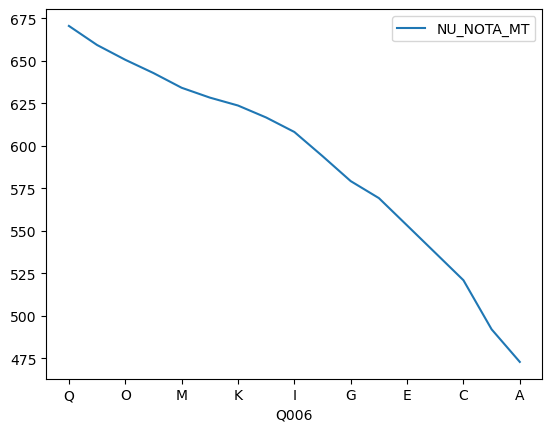

In [100]:
x = microdadosEnemSelecionado.filter(items=['NU_NOTA_MT', 'Q006']).groupby('Q006').mean().sort_values(by='NU_NOTA_MT', ascending=False)
x.plot()

Outra análise interessante para verificar essa tendência é investigar se essa mesma tendência se mantém quando analisamos
um conjunto menor, como um dos estados da federação.

In [125]:
colunasSelecionadas = ['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q006', 'SG_UF_ESC']
microdadosEnemSelecionado = microdadosEnem.filter(items=colunasSelecionadas).dropna()
#Inclusão do título da coluna 'Faixa_Renda_Familiar'
microdadosEnemSelecionado['Faixa_Renda_Familiar'] = [dicionarioporRenda[resposta] for resposta in microdadosEnemSelecionado.Q006]
#microdadosEnemSelecionado.head()

Para essa análise, escolhi um dos estados do sul do país, o estado do Paraná. Sendo natural da região, algo comum no estado do Paraná é a crença na meritocracia, uma ideia de as oportunidades são iguais para todos independente do ponto de partida, da renda familiar, do seu contexto social, dependendo mais do esforço individual. No entanto, os dados confirmam a tendência nacional: quanto maior a renda, melhor o desempenho dos e das candidatas.

In [105]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_MT', 'Faixa_Renda_Familiar']).where(microdadosEnemSelecionado.SG_UF_ESC == 'PR').groupby('Faixa_Renda_Familiar').mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
Faixa_Renda_Familiar,
"Mais de R$ 24.240,00",669.467647
"R$ 18.180,01 - 24.240,00",659.932000
"R$ 14.544,01 - 18.180,00",649.662037
"R$ 12.120,01 - 14.544,00",641.922057
"R$ 10.908,01 - 12.120,00",631.585056
"R$ 9.696,01 - 10.908,00",625.272203
"R$ 8.484,01 - 9.696,00",614.821299
"R$ 7.272,01 - 8.484,00",602.150564
"R$ 6.060,01 - 7.272,00",594.996117


<h3>Correlação entre o desempenho em matemática com a renda familiar por estado da federação</h3>

Por fim, a curva 'Nota de Matemática x Renda Familiar' demonstra a mesma tendência apresentada pelas análises anteriores, quando visualizamos as categorias de renda familiar e o desempenho dos estudantes na prova de matemática. 

Para todos os estados da federação, as curvas demonstram que os desempenhos são similares dentre das mesmas faixas de rendas, com uma tendência de queda linear conforme o/a candidato/a estiver abaixo ou acima na faixa de renda familiar.

Text(0.05, 0.4, 'A : Nenhuma Renda\nB : Até R$ 1212\nC : R$ 1212,01 - 1.818,00\nD : R$ 1.818,01 - 2.424,00\nE : R$ 2.424,01 - 3.030,00\nF : R$ 3.030,01 - 3.636,00\nG : R$ 3.636,01 - 4.848,00\nH : R$ 4.848,01 - 6.060,00\nI : R$ 6.060,01 - 7.272,00\nJ : R$ 7.272,01 - 8.484,00\nK : R$ 8.484,01 - 9.696,00\nL : R$ 9.696,01 - 10.908,00\nM : R$ 10.908,01 - 12.120,00\nN : R$ 12.120,01 - 14.544,00\nO : R$ 14.544,01 - 18.180,00\nP : R$ 18.180,01 - 24.240,00\nQ : Mais de R$ 24.240,00\n')

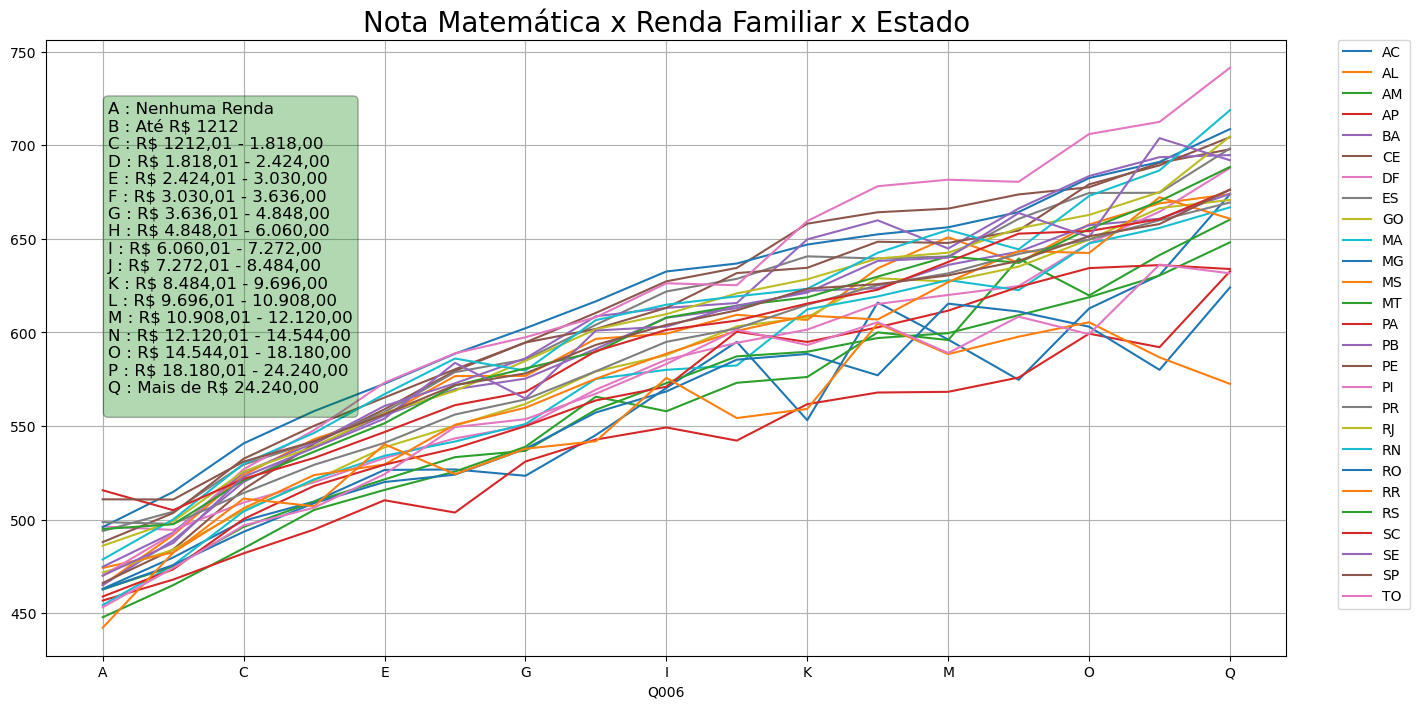

In [106]:
#Gráfico da relação Nota Matemática x Renda Familiar x Estado

grafico = microdadosEnemSelecionado.filter(items=['SG_UF_ESC', 'Q006', 'NU_NOTA_MT'])\
.groupby(['Q006','SG_UF_ESC']).mean().unstack().plot(figsize=(16,8), grid=True)

#Alteração do título do gráfico e do tamanho da fonte

grafico.set_title('Nota Matemática x Renda Familiar x Estado', fontsize=20)

#Alteração das legendas do gráfico, deixando apenas as siglas dos estados

handles, labels = grafico.get_legend_handles_labels()

import re
legendas_editadas = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
grafico.legend(legendas_editadas, bbox_to_anchor=(1.1,1), loc=0, borderaxespad=0)

#Inserção do quadro com as faixas de renda associadas a cada categoria

dicionarioQ006 = ""

for key,value in dicionarioporRenda.items():
    dicionarioQ006 = dicionarioQ006 + "{k} : {v}\n".format(k=key,v=value)

grafico.text(0.05,0.4, dicionarioQ006, transform=grafico.transAxes, fontsize=12, 
            bbox = {'boxstyle': 'round', 'facecolor' : 'green', 'alpha' : 0.3})

<h3>Correlação entre os desempenhos em redação e matemática com o IDHM de cada município</h3>

Outra análise que pode ser interessante para evidenciar os marcadores sociais da desigualdade a partir dos resultados da edição de 2022 do Exame Nacional do Ensino Médio é compararmos esses dados com o Índice de Desenvolvimento Humano Municipal (IDHM), que reúne indicadores demografia, educação, renda, trabalho, dentre outros, dos 5565 municípios brasileiros a partir de dados dos Censos Demográficos realizados a cada 10 anos.

Para realizar a análise, podemos utilizar um gráfico de dispersão classificando os desempenhos nas provas de redação e matemática por município em quatro quadrantes, da seguinte forma:

No primeiro quadrante, estão os municípios cujas médias em redação estão abaixo da média nacional de redação entre todos os municípios e cujo município possui IDHM abaixo do IDHM médio.

No segundo quadrante, estão os municípios cujas médias em redação estão abaixo da média nacional de redação entre todos os municípios e cujo município possui IDHM acima do IDHM médio.

No terceiro quadrante, estão os municípios cujas médias em redação estão acima da média nacional de redação entre todos os municípios e cujo município possui IDHM acima do IDHM médio.

E finalmente, no quatro quadrante estão os municípios cujas médias em redação estão acima da média nacional de redação entre todos os municípios e cujo município possui IDHM abaixo do IDHM médio.

O mesmo esquema de análise se aplica à correlação entre os desempenhos médios dos municípios na prova de matemática e seus IDHMs. 

http://www.atlasbrasil.org.br/ - <b>Atlas do Desenvolvimento Humano no Brasil</b>

In [109]:
#Selecionando as colunas de interesse para análise por município

colunas = ['CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',\
           'NU_NOTA_REDACAO', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']
microdadosEnemSelecionado = pd.read_csv("dados-brutos\DADOS\MICRODADOS_ENEM_2022.csv", sep=";", encoding='ISO-8859-1', usecols=colunas)

#Extraindo as médias por município

mediaporMunicipio = microdadosEnemSelecionado.groupby(['CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC'], as_index=False).mean()
mediaporMunicipio

,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015.0,Alta Floresta D'Oeste,11.0,RO,482.898551,521.657333,499.216000,534.992754,656.533333
1,1100023.0,Ariquemes,11.0,RO,487.737168,514.815818,504.606702,535.383186,613.351206
2,1100031.0,Cabixi,11.0,RO,464.870588,437.478947,429.742105,489.952941,436.842105
3,1100049.0,Cacoal,11.0,RO,488.037712,513.414600,506.028800,534.805297,602.280000
4,1100056.0,Cerejeiras,11.0,RO,487.975000,518.408696,490.573913,535.207500,609.565217
...,...,...,...,...,...,...,...,...,...
5532,5222005.0,Vianópolis,52.0,GO,487.075000,483.954545,484.239394,508.892857,579.393939
5533,5222054.0,Vicentinópolis,52.0,GO,502.347059,499.405556,484.416667,505.876471,512.222222
5534,5222203.0,Vila Boa,52.0,GO,438.329412,450.385714,423.423810,461.488235,381.904762
5535,5222302.0,Vila Propício,52.0,GO,446.987500,478.628000,475.924000,491.204167,581.600000


In [110]:
#Carregamento dos dados do atlas dos municípios com as colunas definidas

colunas = ['ANO', 'UF', 'Codmun6', 'Codmun7', 'Municipio', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R'] 
idhm = pd.read_csv("atlas2013_dadosbrutos_pt.csv", sep=",", encoding='ISO-8859-1', usecols=colunas)

idhm.head()

,ANO,UF,Codmun6,Codmun7,Municipio,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1991,RONDÃNIA,110001,1100015,ALTA FLORESTA D'OESTE,0.329,0.112,0.617,0.516
1,1991,RONDÃNIA,110002,1100023,ARIQUEMES,0.432,0.199,0.684,0.593
2,1991,RONDÃNIA,110003,1100031,CABIXI,0.309,0.108,0.636,0.430
3,1991,RONDÃNIA,110004,1100049,CACOAL,0.407,0.171,0.667,0.593
4,1991,RONDÃNIA,110005,1100056,CEREJEIRAS,0.386,0.167,0.629,0.547


In [126]:
mediaENEMidhm = pd.merge(mediaporMunicipio, idhm, how='left', left_on=['CO_MUNICIPIO_ESC'], right_on=['Codmun7'])
#mediaENEMidhm

In [41]:
#Convertendo os índices que estão como object para ponto flutuante

#mediaENEMidhm['IDHM'] = mediaENEMidhm['IDHM'].apply(lambda x: float(str(x).replace(',','.')))
#mediaENEMidhm.dtypes

#mediaENEMidhm.plot.scatter('NU_NOTA_MT', 'IDHM', figsize=(10,10))

In [113]:
#Definindo a média das médias da redação, da prova de matemática e a média do IDHM por município

media_REDACAO = mediaENEMidhm.NU_NOTA_REDACAO.mean()
media_NU_NOTA_MT = mediaENEMidhm.NU_NOTA_MT.mean()
media_IDHM = mediaENEMidhm.IDHM.mean()
media_REDACAO

557.5194217682887

<h3 align="center">Discussão dos resultados</h3>
    
Quando tentamos correlacionar os resultados tanto da prova de redação quanto da prova de matemática, podemos perceber que os quadrantes 1 e 3, os extremos opostos, concentram uma maioria de municípios, indicando a disparidade entre desempenho dos candidatos dos municípios e IDH municipal. 

Na prática os resultados demonstram que o maior acesso aos serviços de educação, saneamento, saúde, etc, representados pelo IDH de cada município, reflete no desempenho dos e das candidatas.

Embora não tenhamos feito essa correlação, muito provavelmente o IDH municipal combinado com a renda individual das famílias dos/das candidatos, representam uma combinação que implica num desempenho superior desses/dessas candidatos/as.

quadrante 1: 24.844907546828885%, baixo IDHM, baixa nota
quadrante 2: 21.014274528699634%, alto IDHM, baixa nota
quadrante 3: 31.88580377040294%, alto IDHM, alta nota
quadrante 4: 21.63464434138409%, baixo IDHM, alta nota


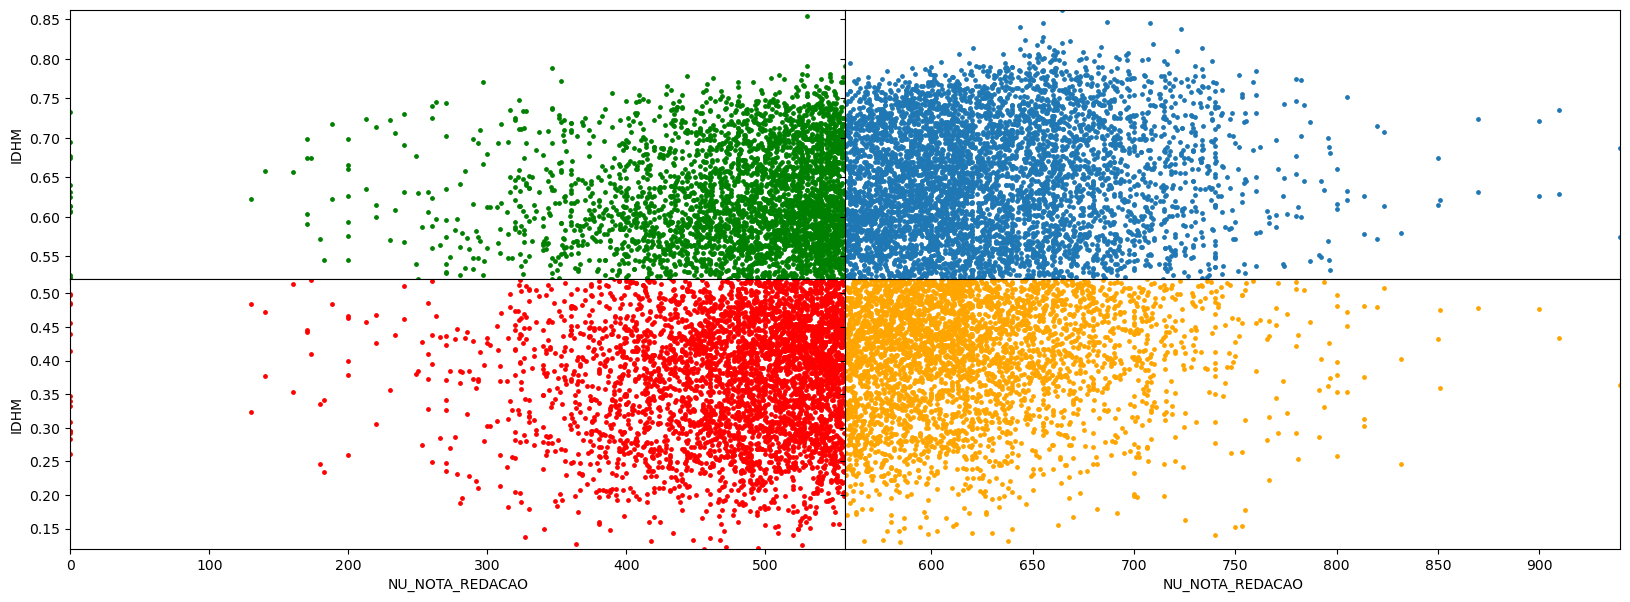

In [116]:
#Definindo os quadrantes para análise comparativa entre nota da redação e IDHM

idhmMunicipio = mediaENEMidhm.IDHM
notaMunicipio = mediaENEMidhm.NU_NOTA_REDACAO

quadrante1 = (idhmMunicipio < media_IDHM) & (notaMunicipio < media_REDACAO)
quadrante2 = (idhmMunicipio > media_IDHM) & (notaMunicipio < media_REDACAO)
quadrante3 = (idhmMunicipio > media_IDHM) & (notaMunicipio > media_REDACAO)
quadrante4 = (idhmMunicipio < media_IDHM) & (notaMunicipio > media_REDACAO)

#Enquadrando os dados de media de prova de redação e média de IDHM por município em cada um dos quadrantes

mediaENEMidhm1 = mediaENEMidhm[quadrante1] 
mediaENEMidhm2 = mediaENEMidhm[quadrante2]
mediaENEMidhm3 = mediaENEMidhm[quadrante3]
mediaENEMidhm4 = mediaENEMidhm[quadrante4]

#Plotando os gráficos de cada quadrante
fig, ax = plt.subplots(2,2, figsize=(20,7), sharex='col', sharey='row')

min_REDACAO = mediaENEMidhm.NU_NOTA_REDACAO.min()
max_REDACAO = mediaENEMidhm.NU_NOTA_REDACAO.max()
min_IDHM = mediaENEMidhm.IDHM.min()
max_IDHM = mediaENEMidhm.IDHM.max()

mediaENEMidhm1.plot.scatter('NU_NOTA_REDACAO', 'IDHM', color='red', s=6, ax = ax[1,0], xlim = (min_REDACAO, media_REDACAO), ylim = (min_IDHM, media_IDHM))
mediaENEMidhm2.plot.scatter('NU_NOTA_REDACAO', 'IDHM', color='green', s=6, ax = ax[0,0], xlim = (min_REDACAO, media_REDACAO), ylim = (media_IDHM, max_IDHM))
mediaENEMidhm3.plot.scatter('NU_NOTA_REDACAO', 'IDHM', s=6, ax = ax[0,1], xlim = (media_REDACAO, max_REDACAO), ylim = (media_IDHM, max_IDHM))
mediaENEMidhm4.plot.scatter('NU_NOTA_REDACAO', 'IDHM', color='orange',  s=6, ax = ax[1,1], xlim = (media_REDACAO, max_REDACAO), ylim = (min_IDHM, media_IDHM))

#Juntando os quadrantes

plt.subplots_adjust(wspace=0, hspace=0)

#Calculando a porcentagem que cada parcela dos dados ocupa no gráfico

print("quadrante 1: {}%, baixo IDHM, baixa nota".format(100*len(mediaENEMidhm1.IDHM)/len(idhmMunicipio)))
print("quadrante 2: {}%, alto IDHM, baixa nota".format(100*len(mediaENEMidhm2.IDHM)/len(idhmMunicipio)))
print("quadrante 3: {}%, alto IDHM, alta nota".format(100*len(mediaENEMidhm3.IDHM)/len(idhmMunicipio)))
print("quadrante 4: {}%, baixo IDHM, alta nota".format(100*len(mediaENEMidhm4.IDHM)/len(idhmMunicipio)))


quadrante 1: 29.681382882611576%, baixo IDHM, baixa nota
quadrante 2: 22.19478407516714%, alto IDHM, baixa nota
quadrante 3: 30.584834066132625%, alto IDHM, alta nota
quadrante 4: 16.70180087935915%, baixo IDHM, alta nota


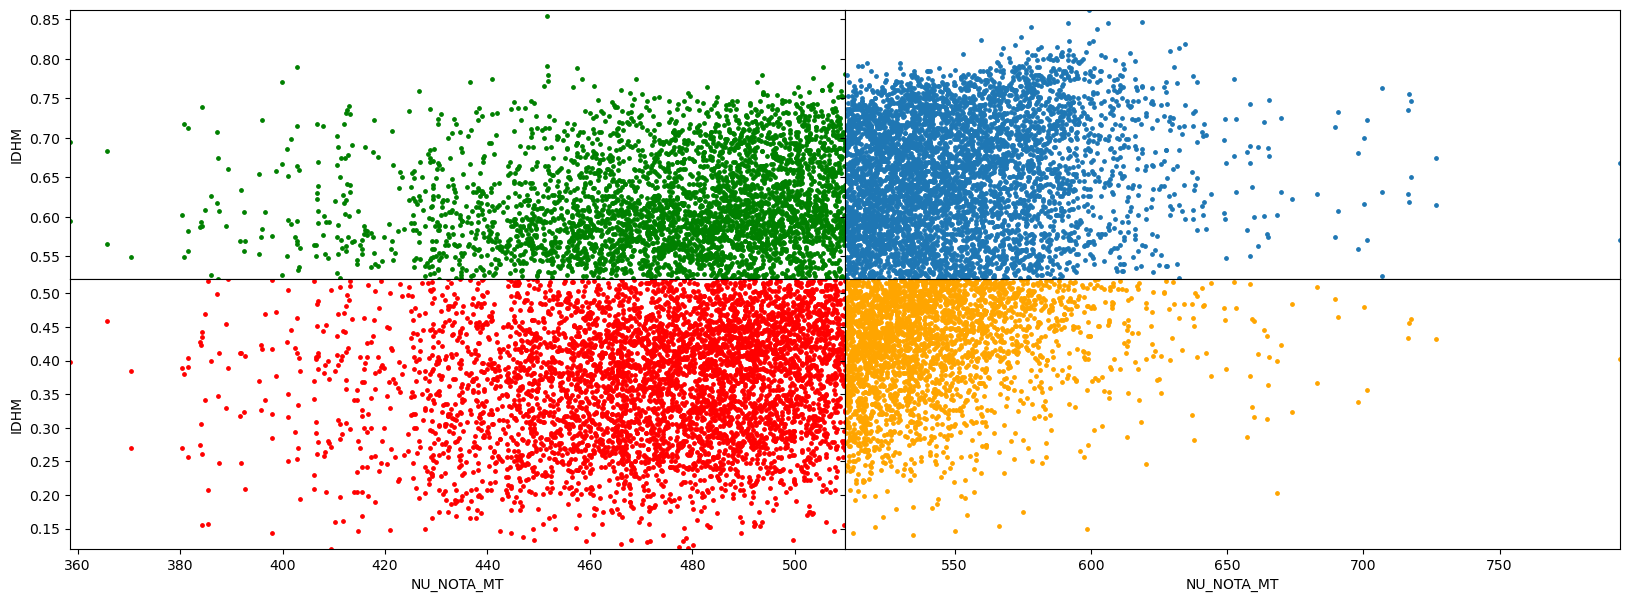

In [117]:
#Definindo os quadrantes para análise comparativa entre nota da matemática e IDHM

idhmMunicipio = mediaENEMidhm.IDHM
notaMunicipio = mediaENEMidhm.NU_NOTA_MT

quadrante1 = (idhmMunicipio < media_IDHM) & (notaMunicipio < media_NU_NOTA_MT)
quadrante2 = (idhmMunicipio > media_IDHM) & (notaMunicipio < media_NU_NOTA_MT)
quadrante3 = (idhmMunicipio > media_IDHM) & (notaMunicipio > media_NU_NOTA_MT)
quadrante4 = (idhmMunicipio < media_IDHM) & (notaMunicipio > media_NU_NOTA_MT)

#Enquadrando os dados de media de prova de matemática e média de IDHM por município em cada um dos quadrantes

mediaENEMidhm1 = mediaENEMidhm[quadrante1] 
mediaENEMidhm2 = mediaENEMidhm[quadrante2]
mediaENEMidhm3 = mediaENEMidhm[quadrante3]
mediaENEMidhm4 = mediaENEMidhm[quadrante4]

#Plotando os gráficos de cada quadrante
fig, ax = plt.subplots(2,2, figsize=(20,7), sharex='col', sharey='row')

min_NU_NOTA_MT = mediaENEMidhm.NU_NOTA_MT.min()
max_NU_NOTA_MT = mediaENEMidhm.NU_NOTA_MT.max()
min_IDHM = mediaENEMidhm.IDHM.min()
max_IDHM = mediaENEMidhm.IDHM.max()

mediaENEMidhm1.plot.scatter('NU_NOTA_MT', 'IDHM', color='red', s=6, ax = ax[1,0], xlim = (min_NU_NOTA_MT, media_NU_NOTA_MT), ylim = (min_IDHM, media_IDHM))
mediaENEMidhm2.plot.scatter('NU_NOTA_MT', 'IDHM', color='green', s=6, ax = ax[0,0], xlim = (min_NU_NOTA_MT, media_NU_NOTA_MT), ylim = (media_IDHM, max_IDHM))
mediaENEMidhm3.plot.scatter('NU_NOTA_MT', 'IDHM', s=6, ax = ax[0,1], xlim = (media_NU_NOTA_MT, max_NU_NOTA_MT), ylim = (media_IDHM, max_IDHM))
mediaENEMidhm4.plot.scatter('NU_NOTA_MT', 'IDHM', color='orange',  s=6, ax = ax[1,1], xlim = (media_NU_NOTA_MT, max_NU_NOTA_MT), ylim = (min_IDHM, media_IDHM))

#Juntando os quadrantes

plt.subplots_adjust(wspace=0, hspace=0)

#Calculando a porcentagem que cada parcela dos dados ocupa no gráfico

print("quadrante 1: {}%, baixo IDHM, baixa nota".format(100*len(mediaENEMidhm1.IDHM)/len(idhmMunicipio)))
print("quadrante 2: {}%, alto IDHM, baixa nota".format(100*len(mediaENEMidhm2.IDHM)/len(idhmMunicipio)))
print("quadrante 3: {}%, alto IDHM, alta nota".format(100*len(mediaENEMidhm3.IDHM)/len(idhmMunicipio)))
print("quadrante 4: {}%, baixo IDHM, alta nota".format(100*len(mediaENEMidhm4.IDHM)/len(idhmMunicipio)))
